In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [2]:
new_data = pd.read_csv('Att2CleanData.csv')

In [3]:
x_new_data = new_data.drop(['GoodLoan'], axis=1)
y_new_data = new_data['GoodLoan']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x_new_data, y_new_data, test_size=0.33, random_state=42)

In [5]:
# Apply the random over-sampling
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(X_train, y_train)


In [10]:
unique, counts = np.unique(y_resampled, return_counts=True)
dict(zip(unique, counts))

{0.0: 513515, 1.0: 509663}

In [12]:
ros = RandomOverSampler()
X_resampled_ros, y_resampled_ros = ros.fit_sample(X_train, y_train)

In [25]:
unique_r, counts_r = np.unique(y_resampled_ros, return_counts=True)
dict(zip(unique_r, counts_r))

{0.0: 509663, 1.0: 509663}

In [5]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_sm, y_sm = sm.fit_sample(X_train, y_train)
unique_rsm, counts_rsm = np.unique(y_sm, return_counts=True)
dict(zip(unique_rsm, counts_rsm))

/home/pizzle/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


{0.0: 509663, 1.0: 509663}

In [10]:
clf_sm = LogisticRegression()
clf_sm.fit(x_sm, y_sm)

print(clf_sm.score(x_sm, y_sm))

0.850980942309


In [11]:
scores = cross_val_score(clf_sm, x_sm, y_sm, cv=5)
print(scores)

[ 0.84020876  0.85140239  0.85200573  0.85224954  0.85313739]


In [12]:
y_score = clf_sm.decision_function(X_test)
ave_prec = average_precision_score(y_test, y_score)
print(ave_prec)

0.988370198103


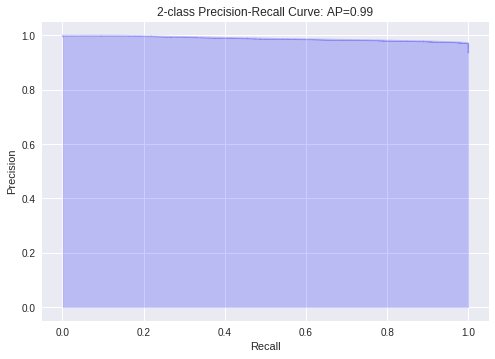

In [13]:
prec, rec, _ = precision_recall_curve(y_test, y_score)
plt.step(rec, prec, color='b', alpha=0.2, where='post')
plt.fill_between(rec, prec, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(ave_prec))
plt.show()

In [17]:
clf_ros = LogisticRegression()
clf_ros.fit(X_resampled_ros, y_resampled_ros)

print(clf_ros.score(X_resampled_ros, y_resampled_ros))

0.814322405197


In [18]:
scores = cross_val_score(clf_ros, X_resampled_ros, y_resampled_ros, cv=5)
print(scores)

[ 0.81323026  0.81391208  0.81736533  0.81568595  0.81280658]


In [14]:
clf = LogisticRegression()
clf.fit(X_resampled, y_resampled)

print(clf.score(X_resampled, y_resampled))

0.758291323699


In [15]:
scores = cross_val_score(clf, X_resampled, y_resampled, cv=5)
print(scores)

[ 0.76142028  0.72904083  0.75927989  0.74756029  0.74845457]


In [15]:
y_score = clf.decision_function(X_test)
ave_prec = average_precision_score(y_test, y_score)
print(ave_prec)

0.987851610633


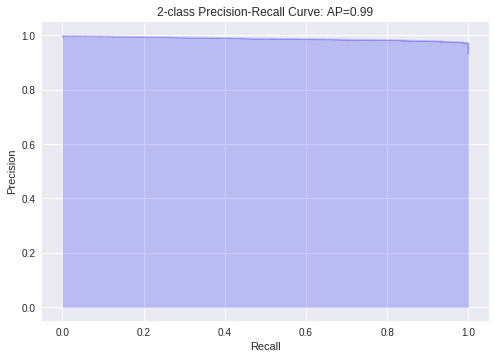

In [16]:
prec, rec, _ = precision_recall_curve(y_test, y_score)
plt.step(rec, prec, color='b', alpha=0.2, where='post')
plt.fill_between(rec, prec, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall Curve: AP={0:0.2f}'.format(ave_prec))
plt.show()

In [1]:
param_grid = {'C':[0.0001, 0.001, 0.1, 1, 10, 100]}

clf = GridSearchCV(LogisticRegression(), param_grid)
clf.fit(X_resampled, y_resampled)

print("Best Values: \n")
print(clf.best_score_)
print()
print("Best Params:")
print(clf.best_params_)
print()

NameError: name 'GridSearchCV' is not defined

In [9]:
clf = LogisticRegression(C=0.1)
clf.fit(X_resapled, y_resampled)
acc_score = accuracy_score(clf.predict(X_test), y_test)
print("The accuracy score Value of C=0.1:", acc_score)

The accuracy score Value of C=0.1: 0.972451024043


In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



In [19]:
y_true, y_pred = y_test, clf.predict(X_test)

In [20]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.61      0.76     18839
        1.0       0.97      1.00      0.99    250681

avg / total       0.97      0.97      0.97    269520



In [15]:
from scipy import interp
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

random_state = np.random.RandomState(0)
cv = StratifiedKFold(n_splits=6)
classifier = LogisticRegression()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)


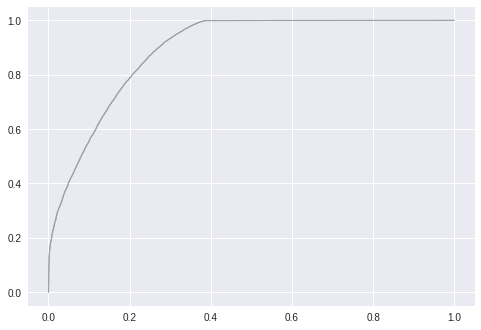

In [16]:
i = 0
for train, test in cv.split(x_sm, y_sm):
    probas_ = classifier.fit(x_sm, y_sm).predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

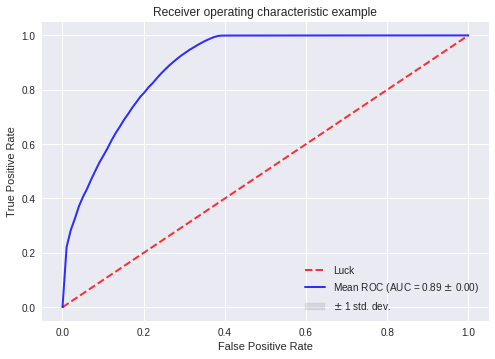

In [17]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()